<h1>**Part One** - Autism Literature</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


**Task 1** - Plot a bar chart of the number of genes in each SFARI gene-score category (2 marks).

In [2]:
genes_df = pd.read_csv('SFARI-Gene.csv', header=0) # reading the 10-29-2020 release SFARI genes data

genes_df.head()

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3


In [3]:
#counts of genes per gene-score
genes_per_score = pd.DataFrame(genes_df.value_counts(['gene-score']), columns=['gene_count'])

#this removes some unpleasent formatting for the index
genes_per_score.index = [i[0] for i in genes_per_score.index]

#show the first few lines
genes_per_score.head()

,gene_count
3.0,507
2.0,207
1.0,194


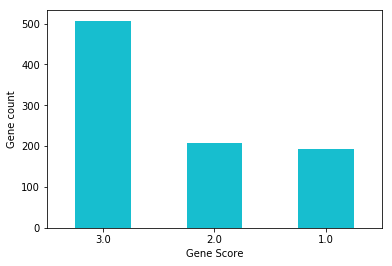

In [26]:
genes_per_score.plot.bar(ylabel='Gene count', xlabel='Gene Score', legend=False, rot=0, color='tab:cyan')

**Task 2** - Rank the genes by ‘number-of-reports’ and find the top 5 SFARI genes that are in gene-score category 1 (2 marks)

In [6]:
genes_sort_reports = genes_df.sort_values(by=['number-of-reports'], ascending=False)
genes_sort_reports_score_1 = genes_sort_reports.loc[genes_sort_reports['gene-score'] == 1.0]
genes_sort_reports_score_1.head()

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
783,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,0,88
570,9,NRXN1,neurexin 1,ENSG00000179915,2,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,0,88
496,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,0,87
757,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic",1.0,0,71
756,9,SCN1A,"sodium channel, voltage-gated, type I, alpha s...",ENSG00000144285,2,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,0,67


**Task 3** - For each of these genes find the number of papers in PubMed that include the gene AND are related to Autism (5 marks).

Searching for "_gene-symbol_ AND Autism" for each of the five genes in PubMed gives the following results:
1. SHANK3 - 355 results
2. NRXN1 - 162 results
3. MECP2 - 496 results
4. SCN2A - 73 results
5. SCN1A - 59 results

**Task 4** - From these data fill a table with genes as rows and paper count by year as column (3 marks).

_This can be done directly in Latex_

**Task 5** - Plot a single stacked histogram displaying the data from the table (3 marks)

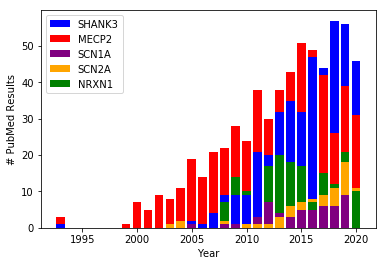

In [71]:
genes_pub_MECP2 = pd.read_csv('PubMed_Timeline_Results_by_Year_MECP2.csv')
genes_pub_SHANK3 = pd.read_csv('PubMed_Timeline_Results_by_Year_SHANK3.csv')
genes_pub_NRXN1 = pd.read_csv('PubMed_Timeline_Results_by_Year_NRXN1.csv')
genes_pub_SCN2A = pd.read_csv('PubMed_Timeline_Results_by_Year_SCN2A.csv')
genes_pub_SCN1A = pd.read_csv('PubMed_Timeline_Results_by_Year_SCN1A.csv')

years = np.arange(1993, 2021, 1)
years = years.T
num_MECP2 = np.flip(np.array((31, 39, 26, 42, 49, 51, 43, 38, 30, 38, 24, 28, 22, 21, 14, 19, 11, 8, 9, 5, 7, 1, 0, 0, 0, 0, 0, 3)))
num_SHANK3 = np.flip(np.array((46, 56, 57, 44, 47, 32, 35, 32, 20, 21, 9, 9, 9, 4, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)))
num_NRXN1 = np.flip(np.array((10, 21, 12, 15, 7, 17, 18, 20, 17, 21, 10, 14, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)))
num_SCN2A = np.flip(np.array((11, 18, 11, 9, 8, 7, 6, 3, 1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)))
num_SCN1A = np.flip(np.array((11, 9, 6, 6, 5, 5, 3, 4, 7, 3, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)))

plt.figure(figsize=(6,4))
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, year in enumerate(years):
#     plt.bar(year,np.flip(num_MECP2))
#     plt.bar(year,np.flip(num_SHANK3))
#     plt.bar(year,np.flip(num_NRXN1))
#     plt.bar(year,np.flip(num_SCN2A))
#     plt.bar(year,np.flip(num_SCN1A))
    
    counts = np.array((np.flip(num_MECP2[i]), np.flip(num_SHANK3[i]), np.flip(num_NRXN1[i]), np.flip(num_SCN2A[i]), np.flip(num_SCN1A[i])))
    order_arg = np.argsort(counts)
    
    for arg in np.flip(order_arg):
#         print(arg)
        if i+1 == np.size(years):
            if arg == 0:
                plt.bar(year,num_MECP2[i],color='red', label='MECP2')
            elif arg == 1:
                plt.bar(year,num_SHANK3[i],color='blue', label='SHANK3')
            elif arg == 2:
                plt.bar(year,num_NRXN1[i],color='green', label='NRXN1')
            elif arg == 3:
                plt.bar(year,num_SCN2A[i],color='orange', label='SCN2A')
            elif arg == 4:
                plt.bar(year,num_SCN1A[i],color='purple', label='SCN1A')
        else:
            if arg == 0:
                plt.bar(year,num_MECP2[i],color='red')
            elif arg == 1:
                plt.bar(year,num_SHANK3[i],color='blue')
            elif arg == 2:
                plt.bar(year,num_NRXN1[i],color='green')
            elif arg == 3:
                plt.bar(year,num_SCN2A[i],color='orange')
            elif arg == 4:
                plt.bar(year,num_SCN1A[i],color='purple')
                
plt.legend()
plt.ylabel('# PubMed Results')
plt.xlabel('Year')
plt.savefig('stacked_bar_chart_pubmed_results.png')

Comment on your results. You might want to think about the timescale over which papers have appeared, how different genes have fared over the years, how representative these 5 genes might be. Other factors to consider might be; how confident are you that the papers you have identified are related to Autism and why?

_At first glance from the bar chart above, it seems that the gene MECP2 has either been most studied of these genes with respect to Autism, or it is a gene most commonly associated with Autism in some way, or both. If we search in PubMed for these genes without the Autism tag, we get the following results:
1. SHANK3 - 537 results
2. NRXN1 - 358 results
3. MECP2 - 3,244 results
4. SCN2A - 622 results
5. SCN1A - 1,259 results
_These results seem to indicate that despite MECP2 having many results with respect to Autism, there are generally many more results for this gene than the others anyway. As a proportion of the number of papers with MECP2 and Autism to the total number of papers for this gene, that proportion is 496/3,244 = 0.153, whereas for SHANK3 the proportion is 355/537 = 0.661. This indicates that SHANK3 may be more relevent to Autism than MECP2, since most of the papers on the SHANK3 gene are related to Autism. However, what is clearer is that the gene SCN1A, despite it having the second highest number of papers on its own, only has as a proportion 59/1,259 = 0.047 papers associate with Autism. So despite it being a well studied gene, this would indicate it is less related with Autism than the other genes.